Phase 1: Data Cleaning & Feature Engineering

In [34]:
import pandas as pd
import numpy as np
import folium
import plotly.express as px

# Load Superstore data
df = pd.read_csv('Superstore.csv', encoding='ISO-8859-1')


df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [38]:
# Feature engineering: Profit Margin (%)
df['Profit Margin'] = (df['Profit'] / df['Sales']) * 100
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,16.0


In [40]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


# Extract order month and year
df['Order Month'] = df['Order Date'].dt.month_name()
df['Order Year'] = df['Order Date'].dt.year
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,16.0,November,2016


In [41]:
df = df[df['Profit'] > -1000].copy()
df.head(1)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Profit Margin,Order Month,Order Year
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136,16.0,November,2016


Phase 2: Exploratory Data Analysis (EDA)

A: High-Level Performance Metrics

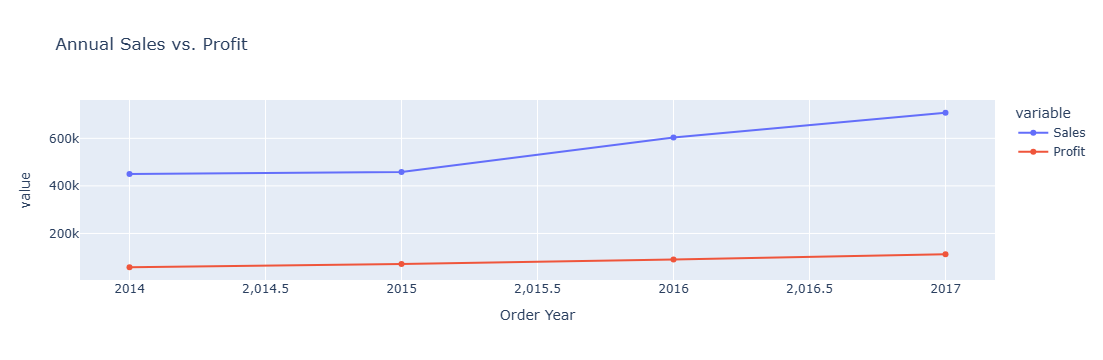

In [42]:
# Total sales/profit by year
annual_summary = df.groupby('Order Year').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Interactive plot with Plotly
import plotly.express as px
fig = px.line(annual_summary, x='Order Year', y=['Sales', 'Profit'], 
              title='Annual Sales vs. Profit', markers=True)
fig.show()

B. Geographic Analysis

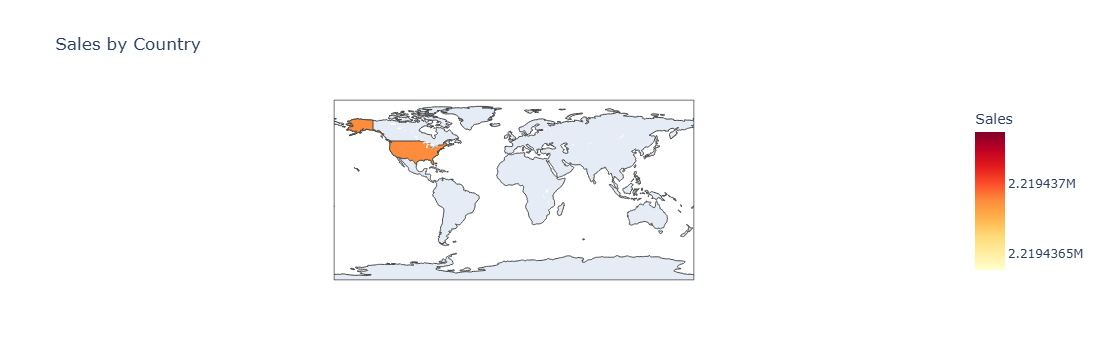

In [43]:
# Step 1: Group sales by country
country_sales = df.groupby('Country')['Sales'].sum().reset_index()

# Step 2: Create a simple interactive map
fig = px.choropleth(
    country_sales,                     # Data
    locations='Country',               # Column with country names
    locationmode='country names',      # Tell plotly we are using country names
    color='Sales',                     # Column to color by
    color_continuous_scale='YlOrRd',   # Color scale
    title='Sales by Country'           # Map title
)

# Step 3: Show the map
fig.show()

Phase 3: Advanced Analytics

A. Time Series Forecasting (Sales)

In [45]:
# Group sales by month
monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum()

# See the first few rows
print(monthly_sales.head())


Order Date
2014-01-31    14236.895
2014-02-28     4519.892
2014-03-31    33052.529
2014-04-30    28295.345
2014-05-31    23648.287
Freq: ME, Name: Sales, dtype: float64


In [46]:
# Extract month and year
df['Order Month'] = df['Order Date'].dt.month_name()
df['Order Year'] = df['Order Date'].dt.year

# Check the result
print(df[['Order Date', 'Order Month', 'Order Year']].head())

  Order Date Order Month  Order Year
0 2016-11-08    November        2016
1 2016-11-08    November        2016
2 2016-06-12        June        2016
3 2015-10-11     October        2015
4 2015-10-11     October        2015
